In [1]:
#importing bunch of libraries that would be needed in future
import pandas as pd
import numpy as np
import gc,os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import pickle
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix
 
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir('/content/gdrive/My Drive/santander_transcation_prediction')

In [4]:
#train
df=pd.read_csv("train.csv.zip")
X=df.drop(['target','ID_code'],axis=1)
Y=df['target']


In [5]:
#train - valid split
from sklearn.model_selection import train_test_split
X_, X_valid, Y_, Y_valid = train_test_split(X, Y, test_size=0.1, random_state=42,stratify=Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.1, random_state=42,stratify=Y_)


In [6]:
X_train.shape,X_valid.shape,X_test.shape

((162000, 200), (20000, 200), (18000, 200))

### lr=0.1,ff=1,bf=1,n_leaves=4

In [ ]:
# LGBM PARAMETERS
param = {
    'learning_rate': 0.1,
    'num_leaves': 4,
    'metric':'auc',
    'boost_from_average':'false',
    'max_depth': -1,
    'min_sum_hessian_in_leaf': 10.0,
    'objective': 'binary',
    'verbosity': 1,
    'num_threads':2
    }

In [ ]:
train_sample = lgb.Dataset(X_train, label=Y_train)
valid_sample = lgb.Dataset(X_valid, label=Y_valid)
 
#lgb classifier : training untill validation score does not increase after 3000 rounds
num_round = 500000
lgb_clf = lgb.train(param, train_sample, num_round,valid_sets = [train_sample, valid_sample], verbose_eval=1000, early_stopping_rounds = 3000)


Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.920184	valid_1's auc: 0.888294
[2000]	training's auc: 0.936739	valid_1's auc: 0.890778
[3000]	training's auc: 0.948687	valid_1's auc: 0.890759
[4000]	training's auc: 0.958265	valid_1's auc: 0.890752
[5000]	training's auc: 0.966265	valid_1's auc: 0.889818
Early stopping, best iteration is:
[2630]	training's auc: 0.944588	valid_1's auc: 0.891203


* By observing train and valid we can conclude that there are chances of overfitting
* To reduce overfitting..reducing learning rate as well as feature fraction & bagging fraction

** Train Metric **

In [ ]:

train_proba=lgb_clf.predict(X_train)
y_pred_label=np.where(train_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_train, train_proba)
print('auc_train:',auc_oof)


cm_train=confusion_matrix(Y_train, y_pred_label)
print('conf_mat_train:')
print(cm_train)

precision=precision_score(Y_train, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_train, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_train, y_pred_label)
print("f1 Score :",f1)


auc_train: 0.9445878043642922
conf_mat_train:
[[144751    970]
 [  8788   7491]]
Precison Score : 0.8853563408580546
recall Score : 0.4601634007002887
f1 Score : 0.6055780113177042


**Test metrics**

In [ ]:

test_proba=lgb_clf.predict(X_test)
y_pred_label=np.where(test_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_test, test_proba)
print('auc_test:',auc_oof)


cm_train=confusion_matrix(Y_test, y_pred_label)
print('conf_mat_test:')
print(cm_train)

precision=precision_score(Y_test, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_test, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_test, y_pred_label)
print("f1 Score :",f1)


auc_test: 0.8980094893330274
conf_mat_test:
[[15975   216]
 [ 1165   644]]
Precison Score : 0.7488372093023256
recall Score : 0.3559977888336097
f1 Score : 0.4825777444735856


Getting kaggle score

---



---



---



In [ ]:
test_score_subm=lgb_clf.predict(X_subm)
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/lgb_lr_0.1_ff_1_ss_1_leaves_4.csv",index=False)

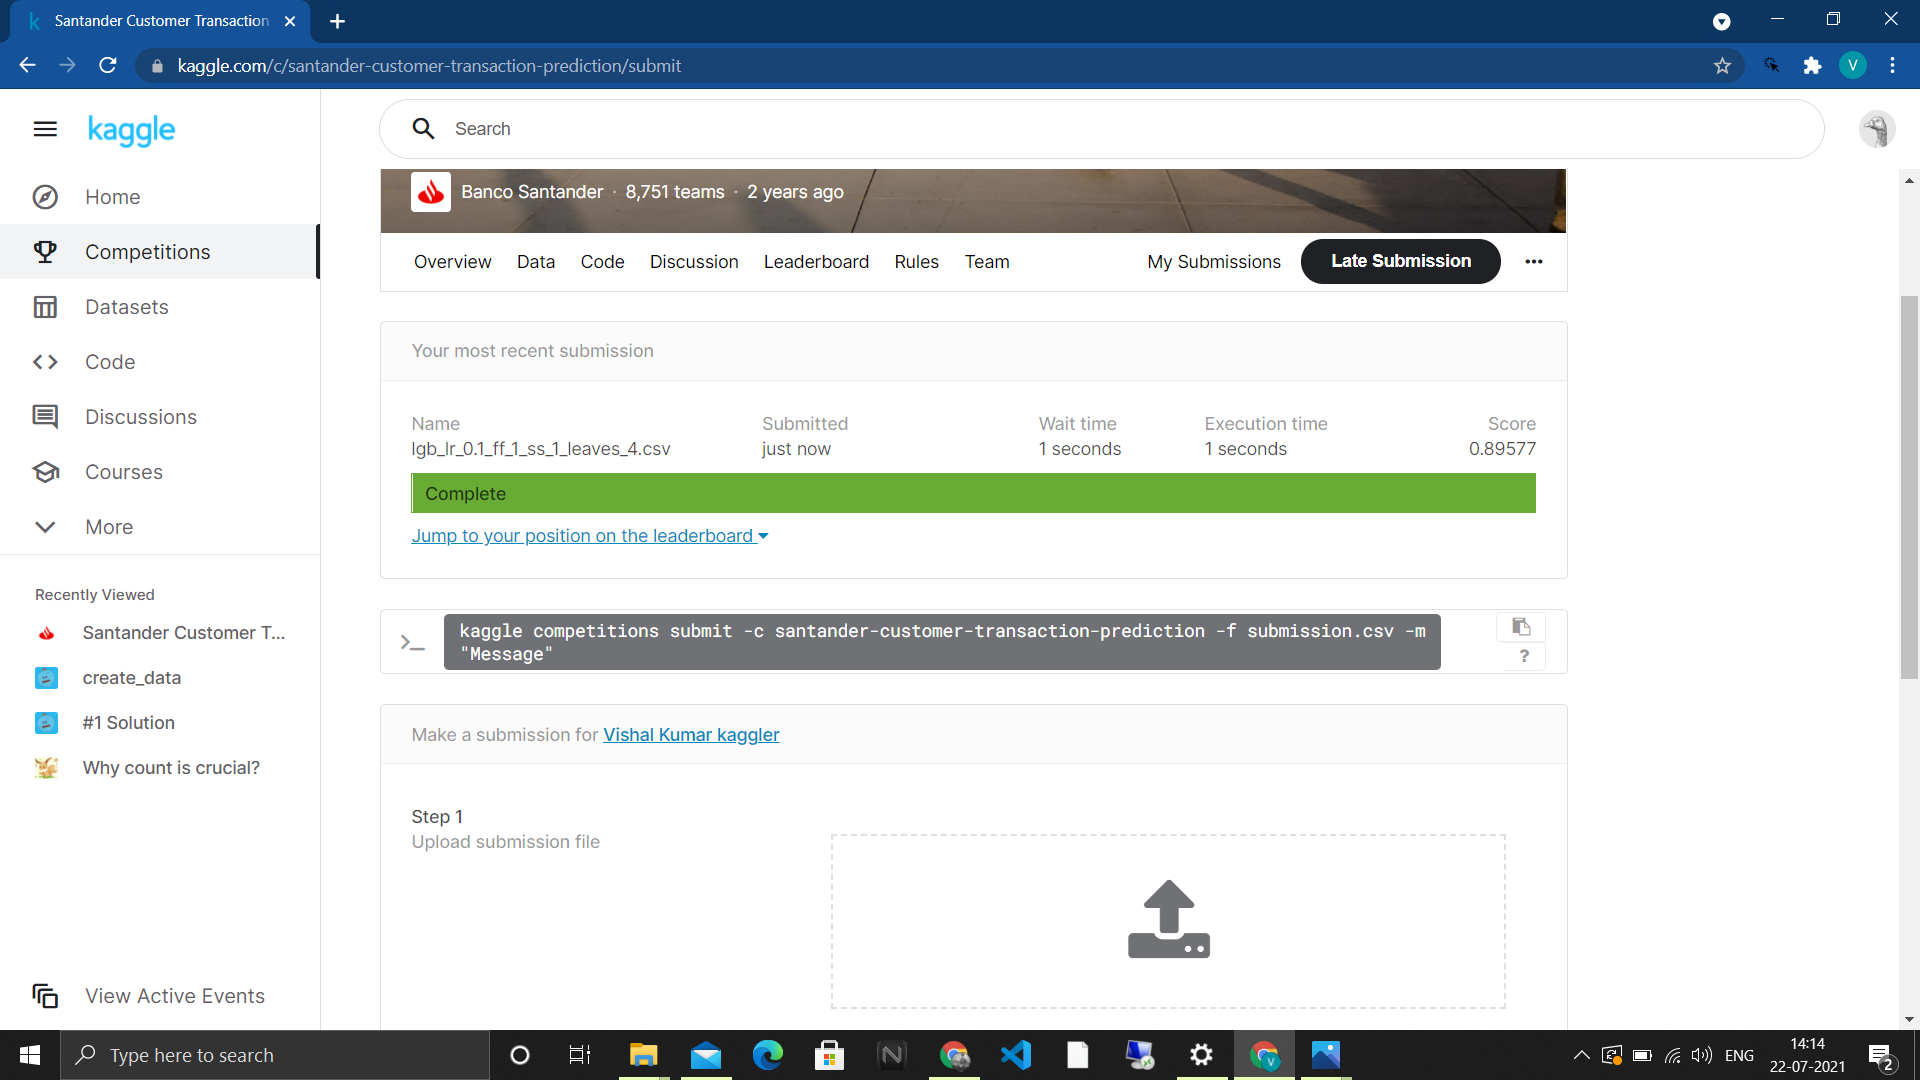

### lr=0.1,ff=1,bf=1,n_leaves=8

In [ ]:
# LGBM PARAMETERS
param = {
    'learning_rate': 0.1,
    'num_leaves': 8,
    'metric':'auc',
    'boost_from_average':'false',
    'max_depth': -1,
    'min_sum_hessian_in_leaf': 10.0,
    'objective': 'binary',
    'verbosity': 1,
    'num_threads':2
    }

In [ ]:
train_sample = lgb.Dataset(X_train, label=Y_train)
valid_sample = lgb.Dataset(X_valid, label=Y_valid)
 
#lgb classifier : training untill validation score does not increase after 3000 rounds
num_round = 500000
lgb_clf = lgb.train(param, train_sample, num_round,valid_sets = [train_sample, valid_sample], verbose_eval=500, early_stopping_rounds = 1000)


Training until validation scores don't improve for 1000 rounds.
[500]	training's auc: 0.929515	valid_1's auc: 0.884147
[1000]	training's auc: 0.950287	valid_1's auc: 0.888284
[1500]	training's auc: 0.964996	valid_1's auc: 0.888026
[2000]	training's auc: 0.975736	valid_1's auc: 0.887547
Early stopping, best iteration is:
[1019]	training's auc: 0.950947	valid_1's auc: 0.888443


* By observing train and valid we can conclude that there are chances of overfitting
* To reduce overfitting..reducing learning rate as well as feature fraction & bagging fraction
* There is always tradeoff between learning rate and number of base tree.We will reduce our learning rate so that many small learning towards right direction will give better perfomance.
* Also keeping n_leaves very small to create more bias

** Train Metric **

In [ ]:

train_proba=lgb_clf.predict(X_train)
y_pred_label=np.where(train_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_train, train_proba)
print('auc_train:',auc_oof)


cm_train=confusion_matrix(Y_train, y_pred_label)
print('conf_mat_train:')
print(cm_train)

precision=precision_score(Y_train, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_train, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_train, y_pred_label)
print("f1 Score :",f1)


auc_train: 0.950946641671283
conf_mat_train:
[[145023    698]
 [  8796   7483]]
Precison Score : 0.9146803569245814
recall Score : 0.4596719700227287
f1 Score : 0.6118560915780867


**Test metrics**

In [ ]:

test_proba=lgb_clf.predict(X_test)
y_pred_label=np.where(test_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_test, test_proba)
print('auc_test:',auc_oof)


cm_train=confusion_matrix(Y_test, y_pred_label)
print('conf_mat_test:')
print(cm_train)

precision=precision_score(Y_test, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_test, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_test, y_pred_label)
print("f1 Score :",f1)


auc_test: 0.8949907985856649
conf_mat_test:
[[16011   180]
 [ 1228   581]]
Precison Score : 0.7634691195795007
recall Score : 0.32117191818684354
f1 Score : 0.4521400778210117


Getting kaggle score

---



---



---



In [ ]:
test_score_subm=lgb_clf.predict(X_subm)
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/lgb_lr_0.1_ff_1_ss_1_leaves_8.csv",index=False)

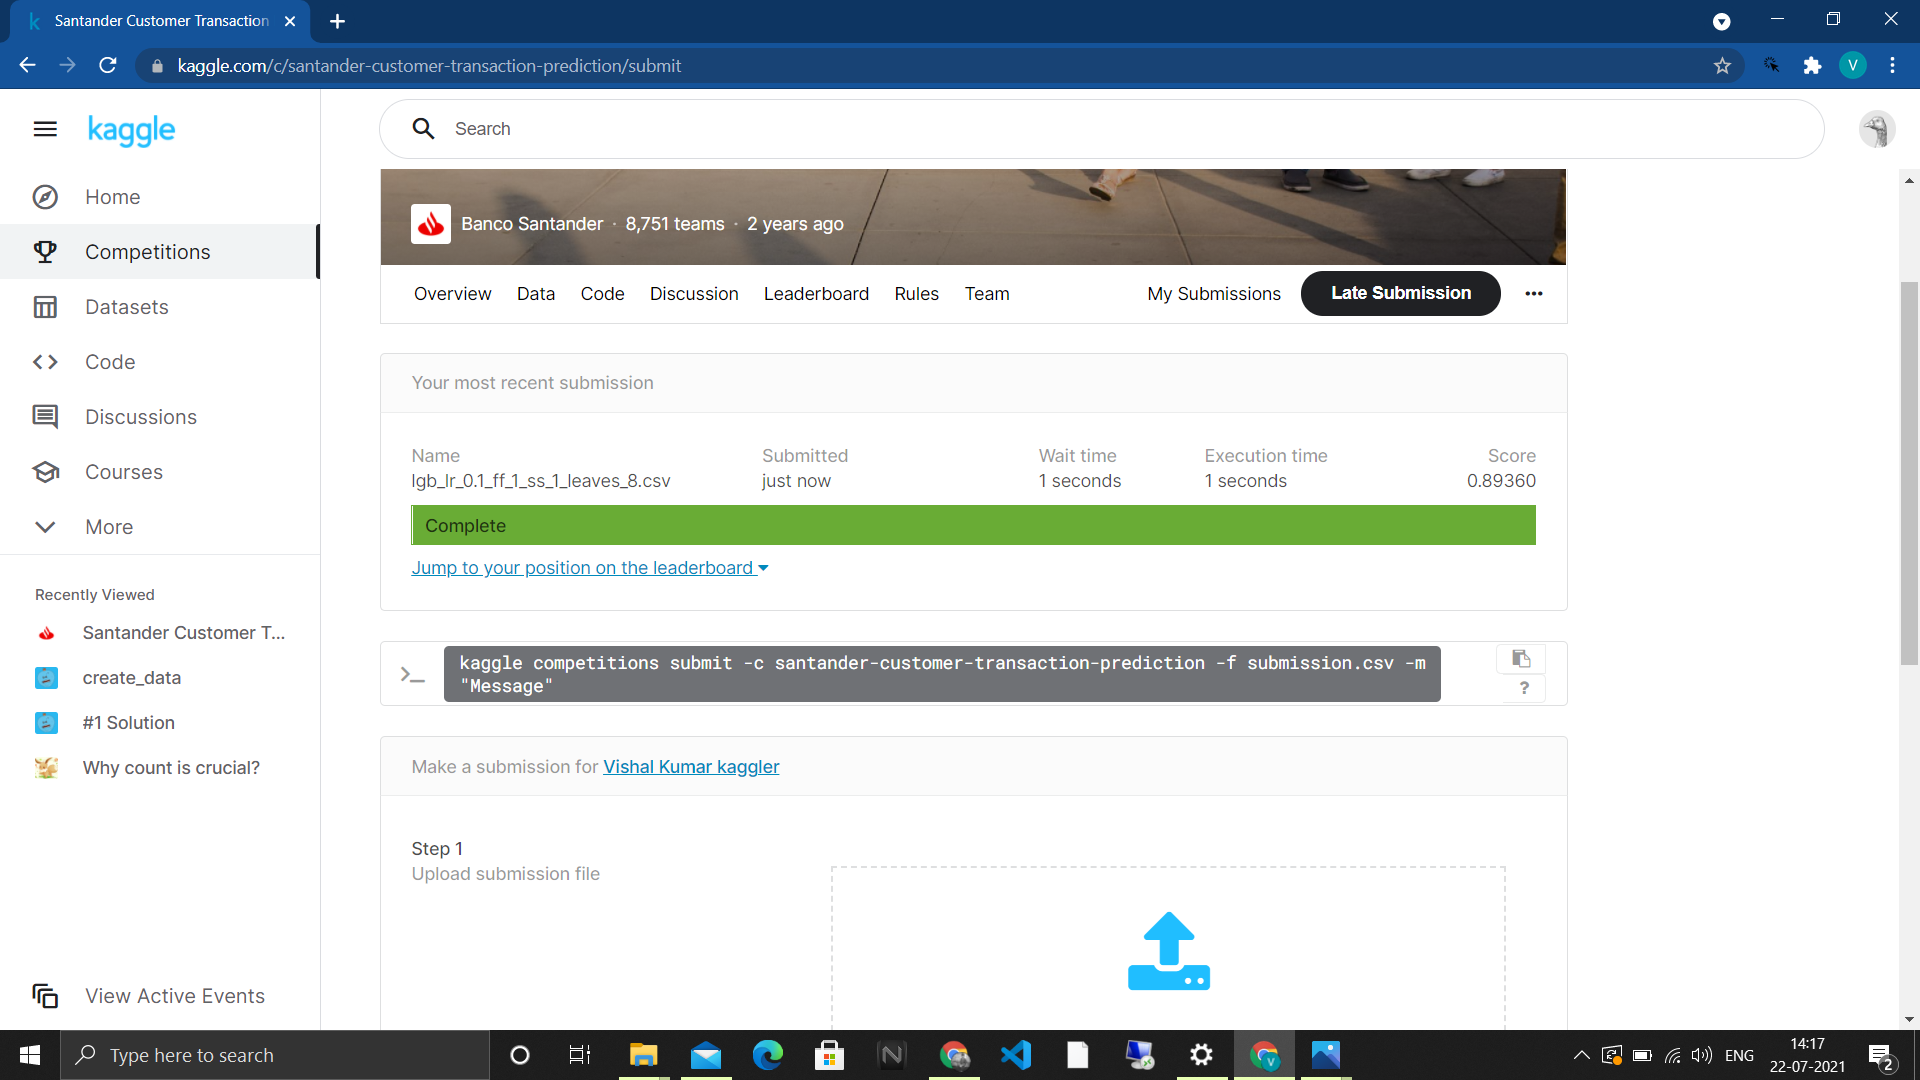

### lr=0.05,ff=0.5,bf=0.5,n_leaves=4

In [ ]:
# LGBM PARAMETERS
param = {
    'learning_rate': 0.05,
    'num_leaves': 4,
    'metric':'auc',
    'boost_from_average':'false',
    'feature_fraction': 0.5,
    'bagging_freq': 5,
    'bagging_fraction': 0.5,
    'max_depth': -1,
    'min_sum_hessian_in_leaf': 10.0,
    'objective': 'binary',
    'verbosity': 1,
    'num_threads':2
    }

In [ ]:
train_sample = lgb.Dataset(X_train, label=Y_train)
valid_sample = lgb.Dataset(X_valid, label=Y_valid)
 
#lgb classifier : training untill validation score does not increase after 3000 rounds
num_round = 500000
lgb_clf = lgb.train(param, train_sample, num_round,valid_sets = [train_sample, valid_sample], verbose_eval=500, early_stopping_rounds = 1000)


Training until validation scores don't improve for 1000 rounds.
[500]	training's auc: 0.88084	valid_1's auc: 0.863221
[1000]	training's auc: 0.903221	valid_1's auc: 0.883075
[1500]	training's auc: 0.912157	valid_1's auc: 0.889523
[2000]	training's auc: 0.917402	valid_1's auc: 0.891771
[2500]	training's auc: 0.921393	valid_1's auc: 0.892614
[3000]	training's auc: 0.925157	valid_1's auc: 0.892511
[3500]	training's auc: 0.928816	valid_1's auc: 0.89286
[4000]	training's auc: 0.932177	valid_1's auc: 0.893222
[4500]	training's auc: 0.935316	valid_1's auc: 0.892972
[5000]	training's auc: 0.938405	valid_1's auc: 0.892977
[5500]	training's auc: 0.941437	valid_1's auc: 0.893018
Early stopping, best iteration is:
[4699]	training's auc: 0.936541	valid_1's auc: 0.893274


* Better results after reducing lr , bagging & feature fraction


** Train Metric **

In [ ]:

train_proba=lgb_clf.predict(X_train)
y_pred_label=np.where(train_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_train, train_proba)
print('auc_train:',auc_oof)


cm_train=confusion_matrix(Y_train, y_pred_label)
print('conf_mat_train:')
print(cm_train)

precision=precision_score(Y_train, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_train, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_train, y_pred_label)
print("f1 Score :",f1)


auc_train: 0.9365408765774442
conf_mat_train:
[[144259   1462]
 [  8678   7601]]
Precison Score : 0.8386847622200154
recall Score : 0.46692057251673935
f1 Score : 0.5998737274090443


**Test metrics**

In [ ]:

test_proba=lgb_clf.predict(X_test)
y_pred_label=np.where(test_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_test, test_proba)
print('auc_test:',auc_oof)


cm_train=confusion_matrix(Y_test, y_pred_label)
print('conf_mat_test:')
print(cm_train)

precision=precision_score(Y_test, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_test, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_test, y_pred_label)
print("f1 Score :",f1)


auc_test: 0.9002728928392439
conf_mat_test:
[[15941   250]
 [ 1105   704]]
Precison Score : 0.7379454926624738
recall Score : 0.38916528468767275
f1 Score : 0.5095910242490047


Getting kaggle score

---



---



---



In [ ]:
test_score_subm=lgb_clf.predict(X_subm)
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/lgb_lr_0.05_ff_0.5_ss_0.5_leaves_4.csv",index=False)

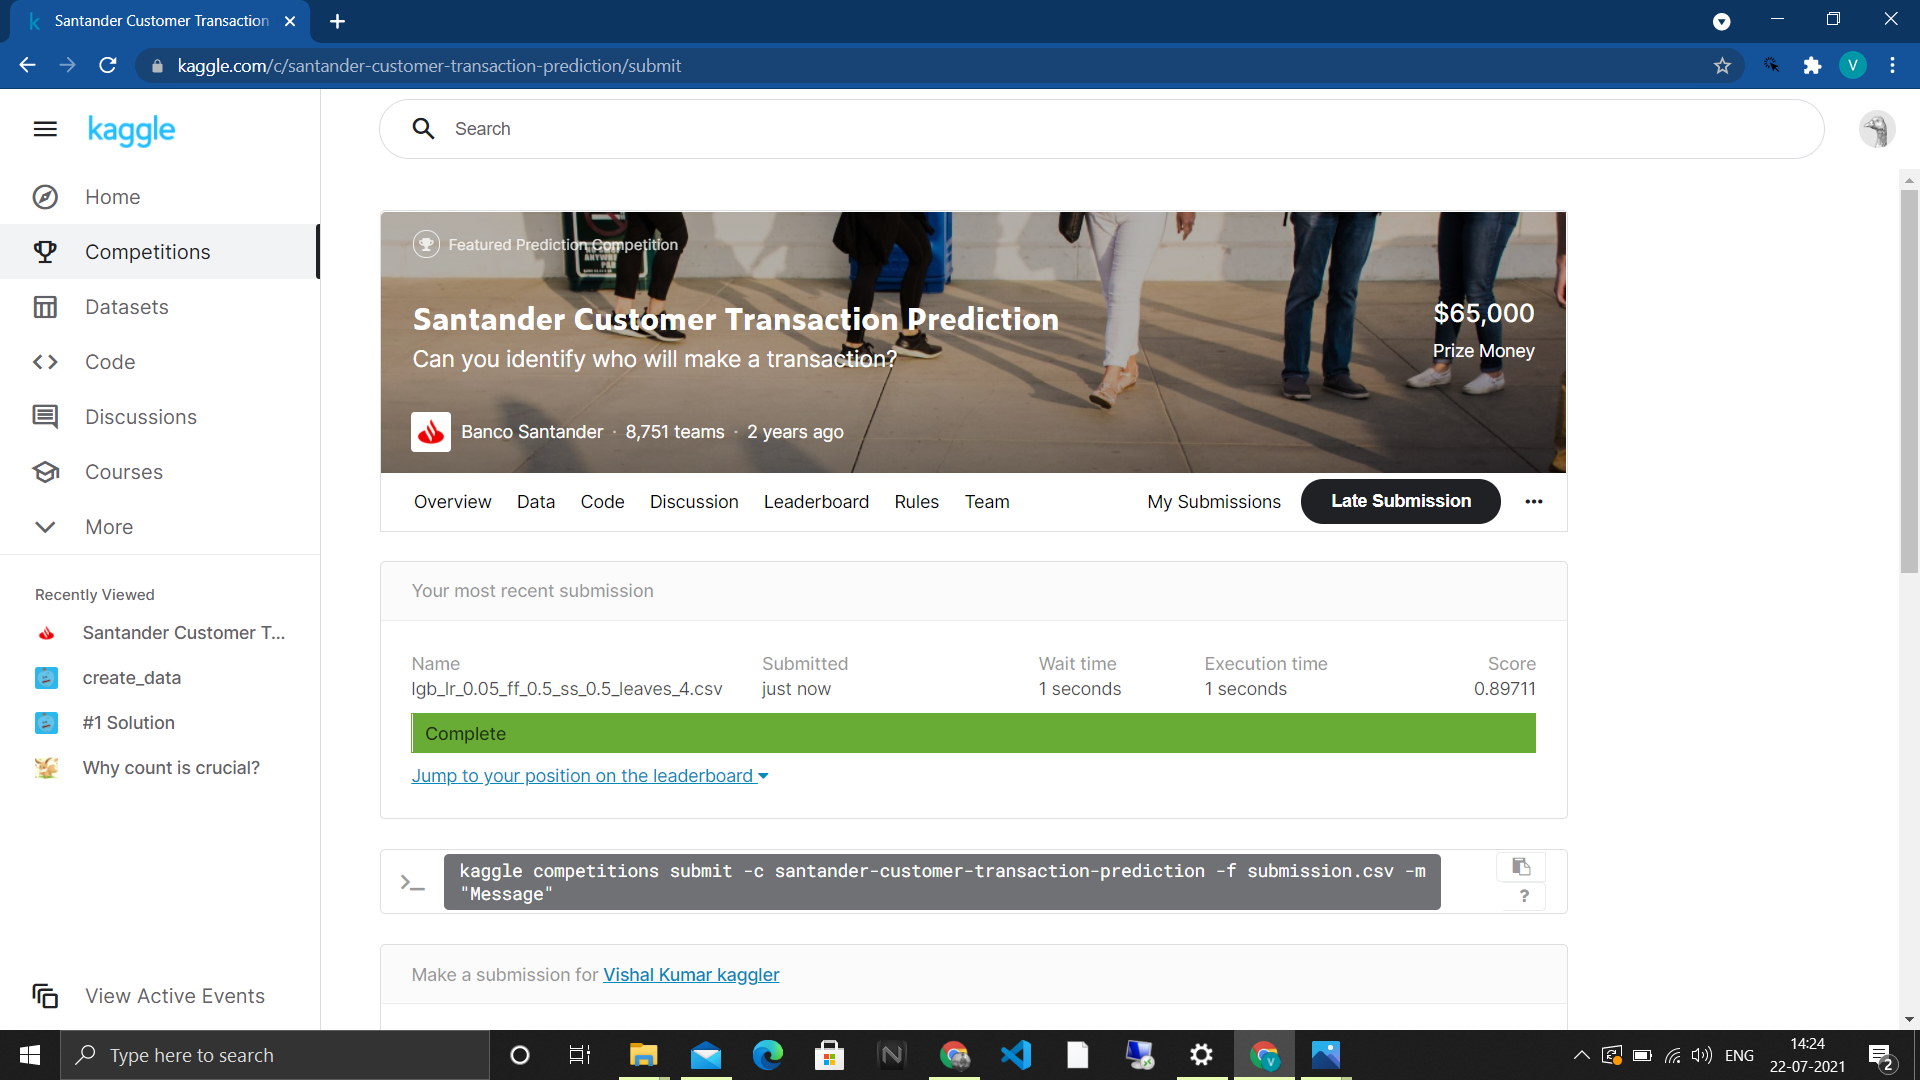

### lr=0.05,ff=0.7,bf=0.7,n_leaves=4

In [ ]:
# LGBM PARAMETERS
param = {
    'learning_rate': 0.05,
    'num_leaves': 4,
    'metric':'auc',
    'boost_from_average':'false',
    'feature_fraction': 0.7,
    'bagging_freq': 5,
    'bagging_fraction': 0.7,
    'max_depth': -1,
    'min_sum_hessian_in_leaf': 10.0,
    'objective': 'binary',
    'verbosity': 1,
    'num_threads':2
    }

In [ ]:
train_sample = lgb.Dataset(X_train, label=Y_train)
valid_sample = lgb.Dataset(X_valid, label=Y_valid)
 
#lgb classifier : training untill validation score does not increase after 3000 rounds
num_round = 500000
lgb_clf = lgb.train(param, train_sample, num_round,valid_sets = [train_sample, valid_sample], verbose_eval=500, early_stopping_rounds = 1000)


Training until validation scores don't improve for 1000 rounds.
[500]	training's auc: 0.88133	valid_1's auc: 0.860358
[1000]	training's auc: 0.90357	valid_1's auc: 0.880242
[1500]	training's auc: 0.912806	valid_1's auc: 0.887195
[2000]	training's auc: 0.918384	valid_1's auc: 0.890039
[2500]	training's auc: 0.922728	valid_1's auc: 0.891529
[3000]	training's auc: 0.92666	valid_1's auc: 0.892248
[3500]	training's auc: 0.930505	valid_1's auc: 0.892197
[4000]	training's auc: 0.934015	valid_1's auc: 0.892232
Early stopping, best iteration is:
[3304]	training's auc: 0.929025	valid_1's auc: 0.892506


** Train Metric **

In [ ]:

train_proba=lgb_clf.predict(X_train)
y_pred_label=np.where(train_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_train, train_proba)
print('auc_train:',auc_oof)


cm_train=confusion_matrix(Y_train, y_pred_label)
print('conf_mat_train:')
print(cm_train)

precision=precision_score(Y_train, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_train, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_train, y_pred_label)
print("f1 Score :",f1)


auc_train: 0.9290248463383441
conf_mat_train:
[[144457   1264]
 [  9464   6815]]
Precison Score : 0.8435449931922268
recall Score : 0.41863750844646475
f1 Score : 0.559569751211101


**Test metrics**

In [ ]:

test_proba=lgb_clf.predict(X_test)
y_pred_label=np.where(test_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_test, test_proba)
print('auc_test:',auc_oof)


cm_train=confusion_matrix(Y_test, y_pred_label)
print('conf_mat_test:')
print(cm_train)

precision=precision_score(Y_test, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_test, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_test, y_pred_label)
print("f1 Score :",f1)


auc_test: 0.9004331549452894
conf_mat_test:
[[15988   203]
 [ 1155   654]]
Precison Score : 0.7631271878646441
recall Score : 0.3615257048092869
f1 Score : 0.490622655663916


Getting kaggle score

---



---



---



In [ ]:
test_score_subm=lgb_clf.predict(X_subm)
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/lgb_lr_0.05_ff_0.7_ss_0.7_leaves_4.csv",index=False)

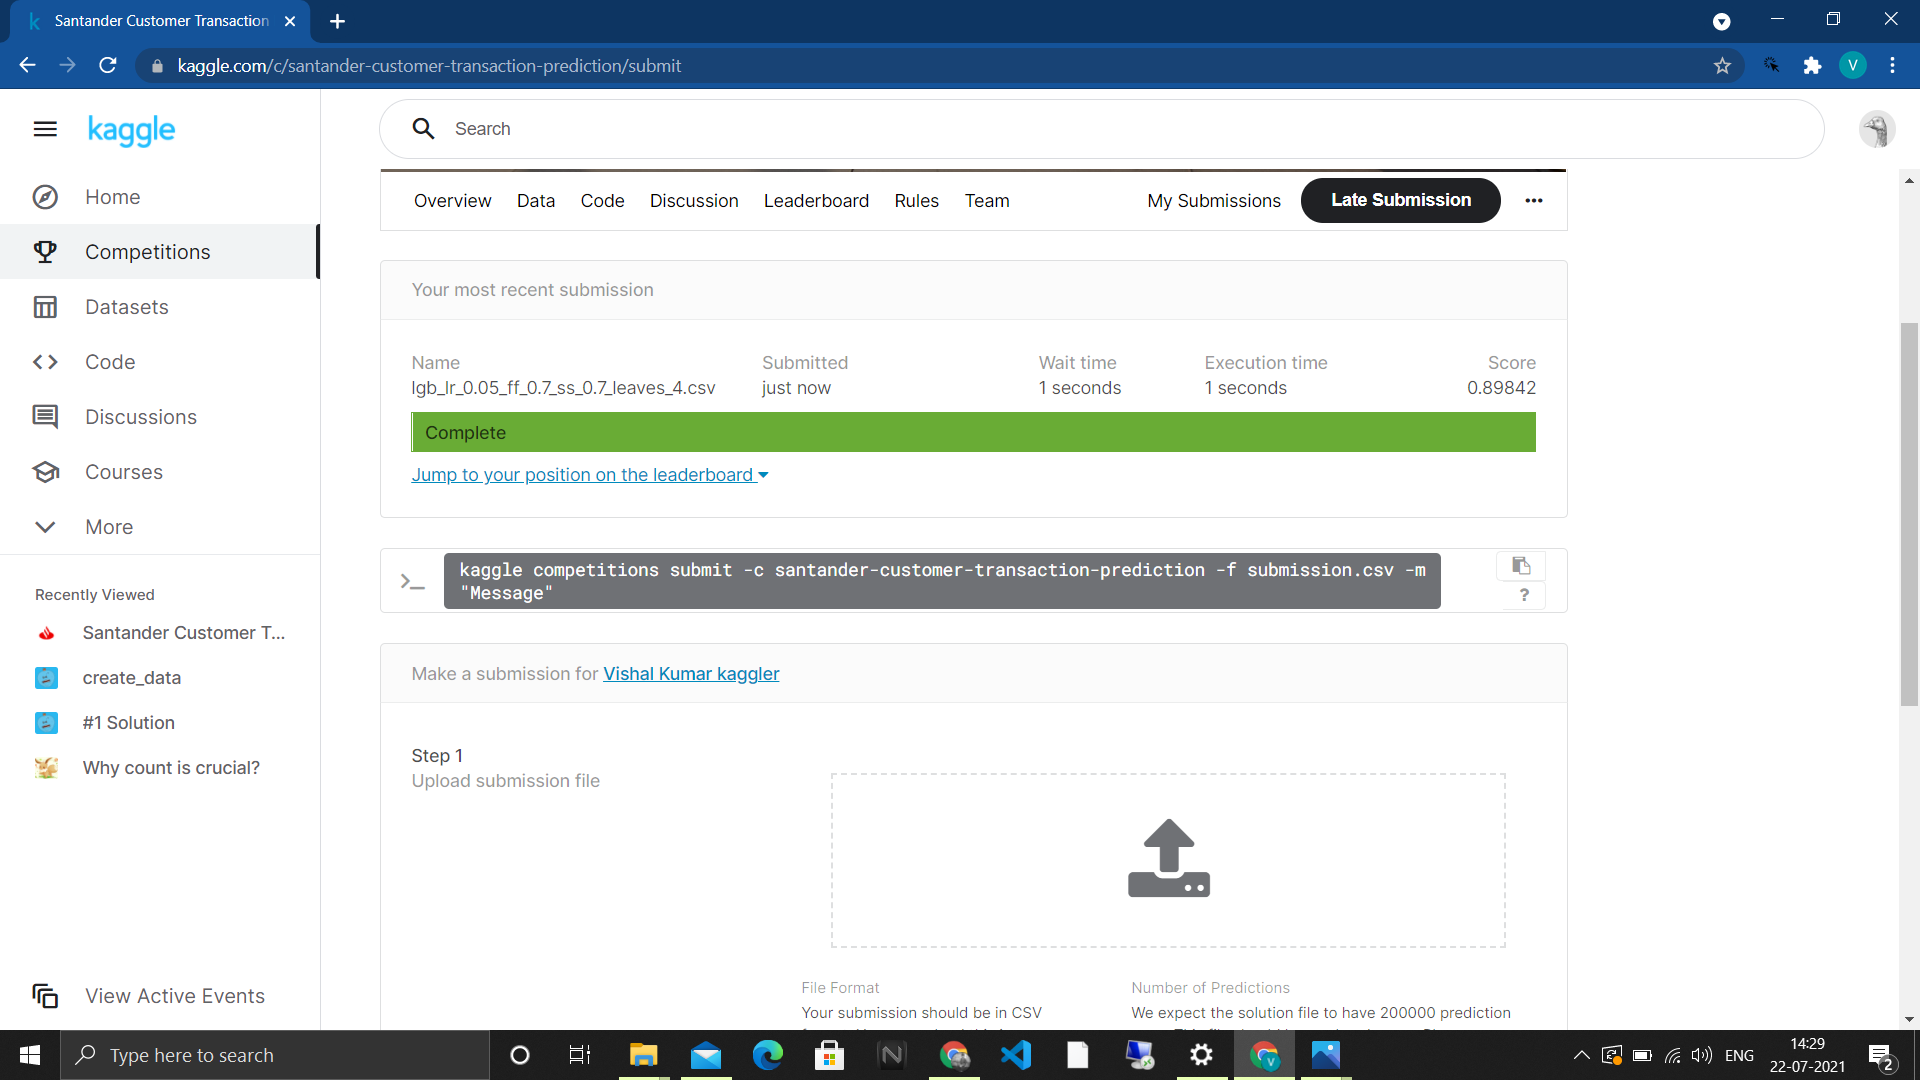

### lr=0.01,ff=0.7,bf=0.7,n_leaves=4

In [ ]:
# LGBM PARAMETERS
param = {
    'learning_rate': 0.01,
    'num_leaves': 4,
    'metric':'auc',
    'boost_from_average':'false',
    'feature_fraction': 0.7,
    'bagging_freq': 5,
    'bagging_fraction': 0.7,
    'max_depth': -1,
    'min_sum_hessian_in_leaf': 10.0,
    'objective': 'binary',
    'verbosity': 1,
    'num_threads':2
    }

In [ ]:
train_sample = lgb.Dataset(X_train, label=Y_train)
valid_sample = lgb.Dataset(X_valid, label=Y_valid)
 
#lgb classifier : training untill validation score does not increase after 3000 rounds
num_round = 500000
lgb_clf = lgb.train(param, train_sample, num_round,valid_sets = [train_sample, valid_sample], verbose_eval=500, early_stopping_rounds = 1000)


Training until validation scores don't improve for 1000 rounds.
[500]	training's auc: 0.798912	valid_1's auc: 0.78297
[1000]	training's auc: 0.840887	valid_1's auc: 0.823068
[1500]	training's auc: 0.861393	valid_1's auc: 0.842141
[2000]	training's auc: 0.873895	valid_1's auc: 0.853863
[2500]	training's auc: 0.882592	valid_1's auc: 0.86217
[3000]	training's auc: 0.888945	valid_1's auc: 0.868415
[3500]	training's auc: 0.894157	valid_1's auc: 0.87333
[4000]	training's auc: 0.898286	valid_1's auc: 0.8771
[4500]	training's auc: 0.901672	valid_1's auc: 0.87987
[5000]	training's auc: 0.904513	valid_1's auc: 0.882346
[5500]	training's auc: 0.906918	valid_1's auc: 0.884493
[6000]	training's auc: 0.909098	valid_1's auc: 0.885953
[6500]	training's auc: 0.910803	valid_1's auc: 0.8871
[7000]	training's auc: 0.91246	valid_1's auc: 0.88814
[7500]	training's auc: 0.913823	valid_1's auc: 0.889066
[8000]	training's auc: 0.915104	valid_1's auc: 0.889779
[8500]	training's auc: 0.916356	valid_1's auc: 0.89

* By observing train and valid we can conclude that there are chances of overfitting
* To reduce overfitting..reducing learning rate as well as feature fraction & bagging fraction

** Train Metric **

In [ ]:

train_proba=lgb_clf.predict(X_train)
y_pred_label=np.where(train_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_train, train_proba)
print('auc_train:',auc_oof)


cm_train=confusion_matrix(Y_train, y_pred_label)
print('conf_mat_train:')
print(cm_train)

precision=precision_score(Y_train, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_train, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_train, y_pred_label)
print("f1 Score :",f1)


auc_train: 0.9338704609553513
conf_mat_train:
[[144480   1241]
 [  9212   7067]]
Precison Score : 0.8506259027443428
recall Score : 0.4341175747896062
f1 Score : 0.5748566315532598


**Test metrics**

In [ ]:

test_proba=lgb_clf.predict(X_test)
y_pred_label=np.where(test_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_test, test_proba)
print('auc_test:',auc_oof)


cm_train=confusion_matrix(Y_test, y_pred_label)
print('conf_mat_test:')
print(cm_train)

precision=precision_score(Y_test, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_test, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_test, y_pred_label)
print("f1 Score :",f1)


auc_test: 0.9016631512453311
conf_mat_test:
[[15980   211]
 [ 1150   659]]
Precison Score : 0.7574712643678161
recall Score : 0.3642896627971255
f1 Score : 0.49197461739455023


Getting kaggle score

---



---



---



In [ ]:
test_score_subm=lgb_clf.predict(X_subm)
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/lgb_lr_0.01_ff_0.7_ss_0.7_leaves_4.csv",index=False)

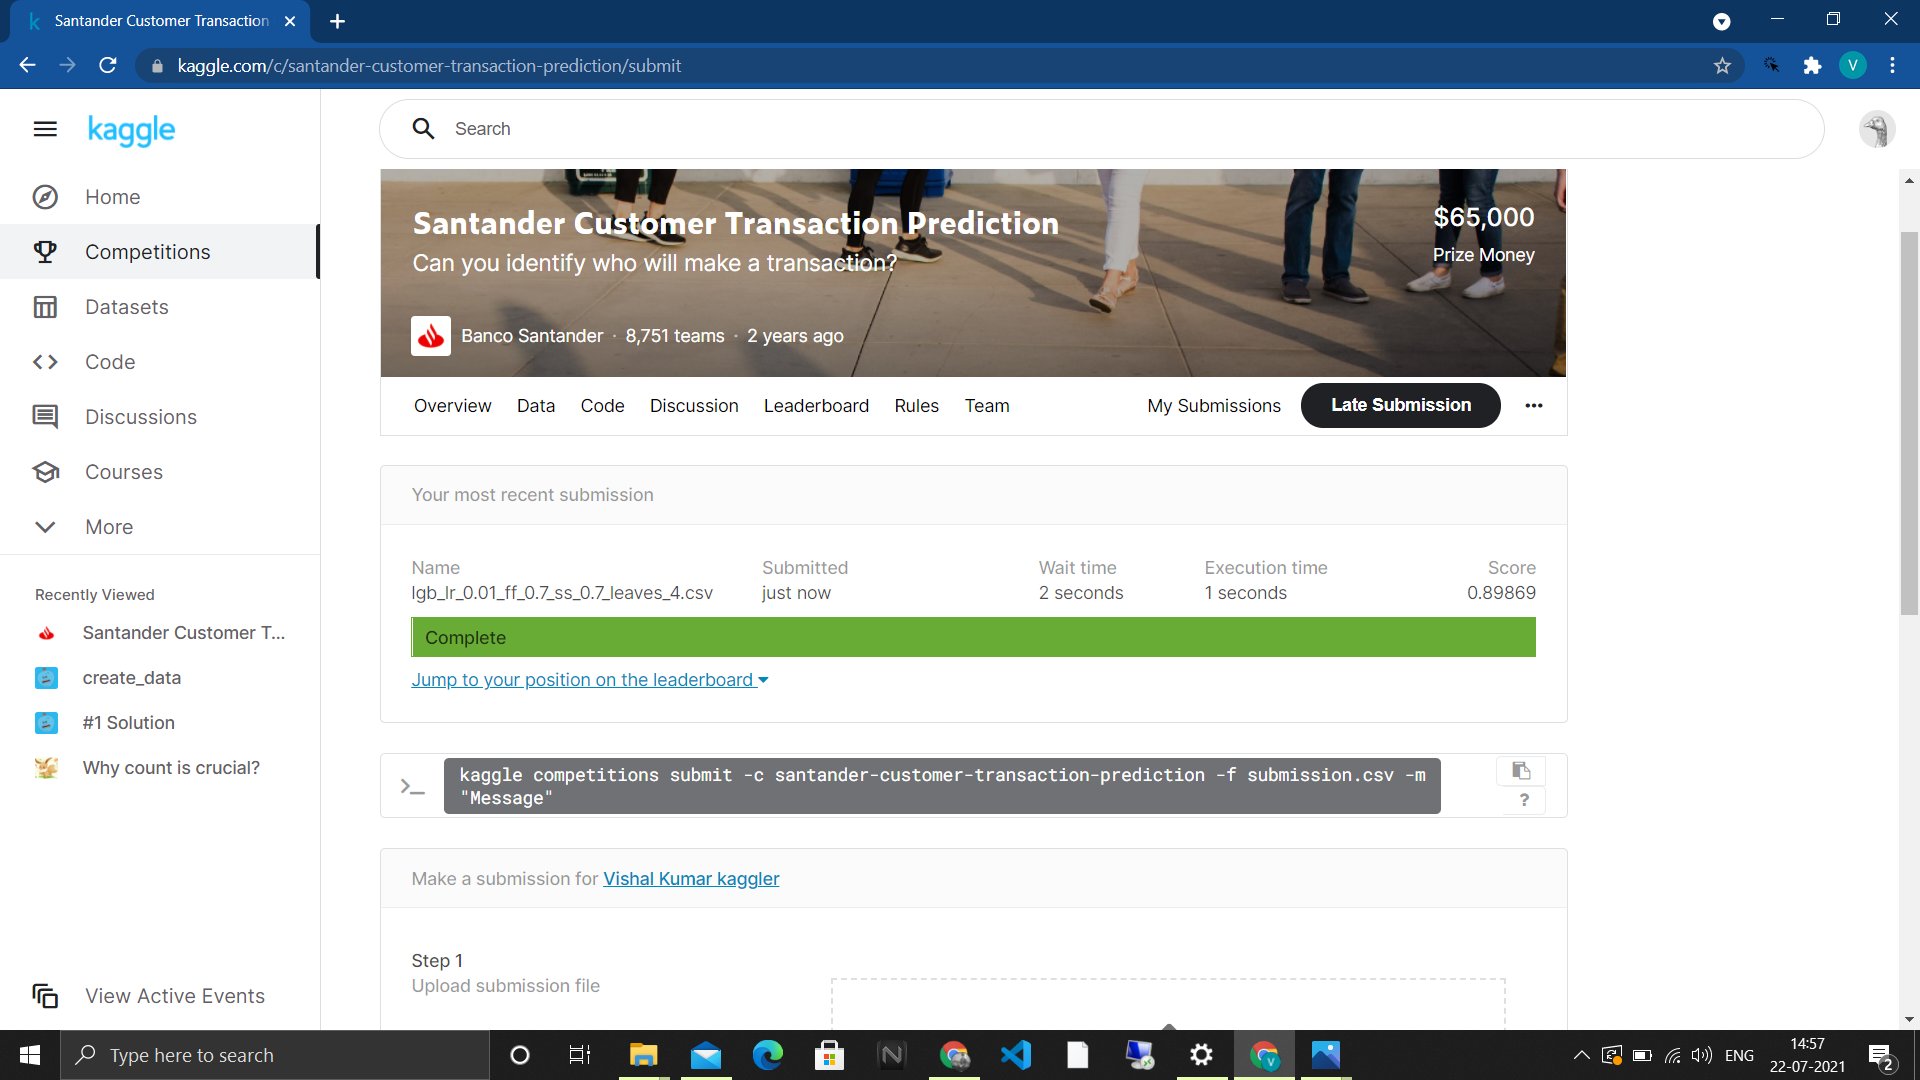

### lr=0.01,ff=0.3,bf=0.3,n_leaves=4

In [25]:
# LGBM PARAMETERS
param = {
    'learning_rate': 0.01,
    'num_leaves': 4,
    'metric':'auc',
    'boost_from_average':'false',
    'feature_fraction': 0.3,
    'bagging_freq': 5,
    'bagging_fraction': 0.3,
    'max_depth': -1,
    'min_sum_hessian_in_leaf': 10.0,
    'objective': 'binary',
    'verbosity': 1,
    'num_threads':2
    }

In [26]:
train_sample = lgb.Dataset(X_train, label=Y_train)
valid_sample = lgb.Dataset(X_valid, label=Y_valid)
 
#lgb classifier : training untill validation score does not increase after 3000 rounds
num_round = 500000
lgb_clf = lgb.train(param, train_sample, num_round,valid_sets = [train_sample, valid_sample], verbose_eval=500, early_stopping_rounds = 1000)


Training until validation scores don't improve for 1000 rounds.
[500]	training's auc: 0.802887	valid_1's auc: 0.789199
[1000]	training's auc: 0.843541	valid_1's auc: 0.828652
[1500]	training's auc: 0.863616	valid_1's auc: 0.847886
[2000]	training's auc: 0.875709	valid_1's auc: 0.859557
[2500]	training's auc: 0.884071	valid_1's auc: 0.867814
[3000]	training's auc: 0.890311	valid_1's auc: 0.873479
[3500]	training's auc: 0.894823	valid_1's auc: 0.877671
[4000]	training's auc: 0.898498	valid_1's auc: 0.881148
[4500]	training's auc: 0.901715	valid_1's auc: 0.883842
[5000]	training's auc: 0.904223	valid_1's auc: 0.885985
[5500]	training's auc: 0.906438	valid_1's auc: 0.887685
[6000]	training's auc: 0.908369	valid_1's auc: 0.889129
[6500]	training's auc: 0.909943	valid_1's auc: 0.890028
[7000]	training's auc: 0.911459	valid_1's auc: 0.89082
[7500]	training's auc: 0.912707	valid_1's auc: 0.891718
[8000]	training's auc: 0.913841	valid_1's auc: 0.891986
[8500]	training's auc: 0.914904	valid_1's 

* Reducing feature fraction and bagging fraction also leads to increase in base tree
* lower the baaging and feature fraction is lower will be the variance

** Train Metric **

In [27]:

train_proba=lgb_clf.predict(X_train)
y_pred_label=np.where(train_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_train, train_proba)
print('auc_train:',auc_oof)


cm_train=confusion_matrix(Y_train, y_pred_label)
print('conf_mat_train:')
print(cm_train)

precision=precision_score(Y_train, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_train, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_train, y_pred_label)
print("f1 Score :",f1)


auc_train: 0.9228176649579762
conf_mat_train:
[[144250   1471]
 [  9585   6694]]
Precison Score : 0.8198407838334354
recall Score : 0.41120461944836906
f1 Score : 0.5477008672884962


**Test metrics**

In [28]:

test_proba=lgb_clf.predict(X_test)
y_pred_label=np.where(test_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_test, test_proba)
print('auc_test:',auc_oof)


cm_train=confusion_matrix(Y_test, y_pred_label)
print('conf_mat_test:')
print(cm_train)

precision=precision_score(Y_test, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_test, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_test, y_pred_label)
print("f1 Score :",f1)


auc_test: 0.9018345094707769
conf_mat_test:
[[15990   201]
 [ 1142   667]]
Precison Score : 0.7684331797235023
recall Score : 0.3687119955776672
f1 Score : 0.49831901382144195


Getting kaggle score

---



---



---



In [29]:
test_score_subm=lgb_clf.predict(X_subm)
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/lgb_lr_0.01_ff_0.3_ss_0.3_hessian_10.csv",index=False)

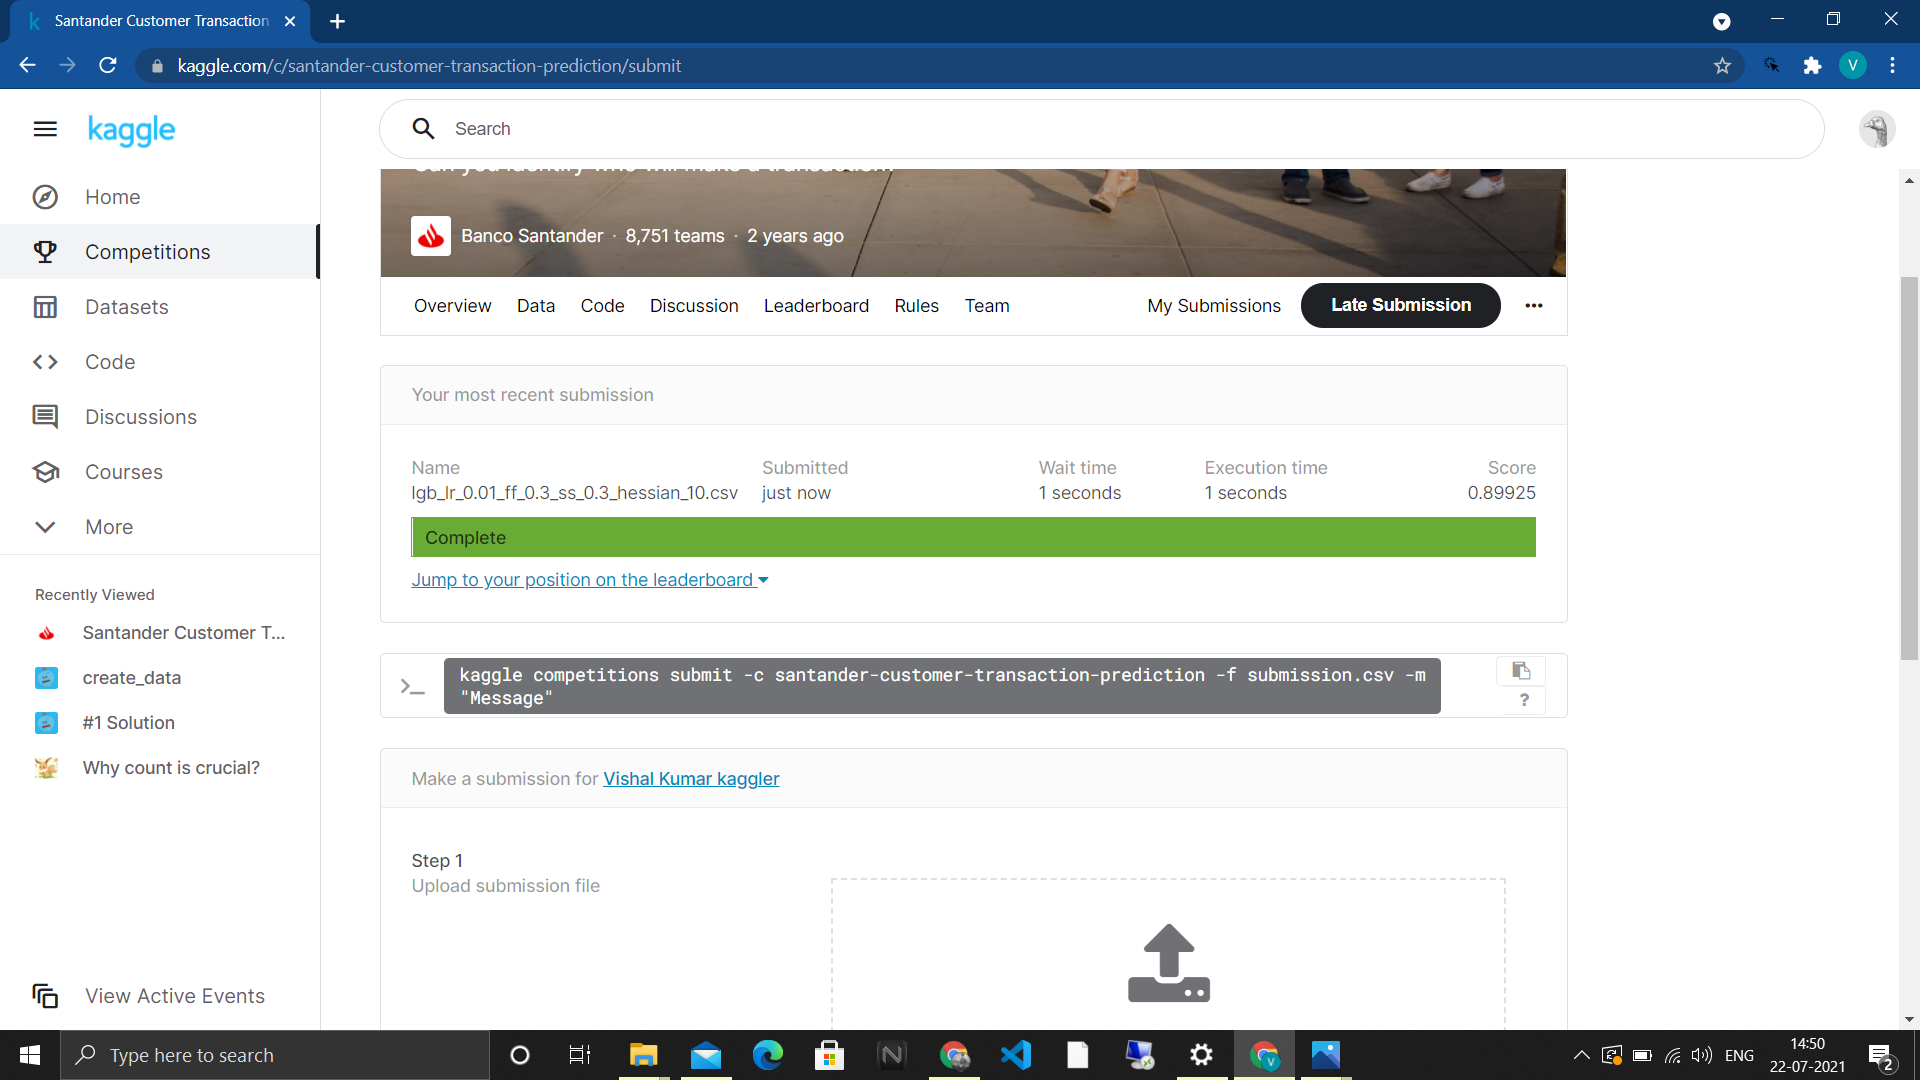

* train and test metrics are closer to each  &also test metric perfomance is good

### lr=0.01,ff=0.4,bf=0.4,n_leaves=4,min_sum_hessian_in_leaf=5



In [20]:
# LGBM PARAMETERS
param = {
    'learning_rate': 0.01,
    'num_leaves': 4,
    'metric':'auc',
    'boost_from_average':'false',
    'feature_fraction': 0.4,
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'max_depth': -1,
    'min_sum_hessian_in_leaf': 5.0,
    'objective': 'binary',
    'verbosity': 1,
    'num_threads':2
    }

In [21]:
train_sample = lgb.Dataset(X_train, label=Y_train)
valid_sample = lgb.Dataset(X_valid, label=Y_valid)
 
#lgb classifier : training untill validation score does not increase after 3000 rounds
num_round = 500000
lgb_clf = lgb.train(param, train_sample, num_round,valid_sets = [train_sample, valid_sample], verbose_eval=500, early_stopping_rounds = 1000)


Training until validation scores don't improve for 1000 rounds.
[500]	training's auc: 0.800136	valid_1's auc: 0.784903
[1000]	training's auc: 0.842944	valid_1's auc: 0.827081
[1500]	training's auc: 0.862427	valid_1's auc: 0.845901
[2000]	training's auc: 0.874773	valid_1's auc: 0.857675
[2500]	training's auc: 0.883297	valid_1's auc: 0.866177
[3000]	training's auc: 0.889422	valid_1's auc: 0.871939
[3500]	training's auc: 0.894345	valid_1's auc: 0.876792
[4000]	training's auc: 0.898128	valid_1's auc: 0.879824
[4500]	training's auc: 0.901562	valid_1's auc: 0.882847
[5000]	training's auc: 0.904169	valid_1's auc: 0.884972
[5500]	training's auc: 0.906513	valid_1's auc: 0.886877
[6000]	training's auc: 0.908434	valid_1's auc: 0.888413
[6500]	training's auc: 0.910071	valid_1's auc: 0.889426
[7000]	training's auc: 0.911594	valid_1's auc: 0.89035
[7500]	training's auc: 0.912978	valid_1's auc: 0.891109
[8000]	training's auc: 0.914172	valid_1's auc: 0.891475
[8500]	training's auc: 0.915344	valid_1's 

* Here learning get slower and taking more base learner to achieve optimal perfomance.


** Train Metric **

In [22]:

train_proba=lgb_clf.predict(X_train)
y_pred_label=np.where(train_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_train, train_proba)
print('auc_train:',auc_oof)


cm_train=confusion_matrix(Y_train, y_pred_label)
print('conf_mat_train:')
print(cm_train)

precision=precision_score(Y_train, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_train, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_train, y_pred_label)
print("f1 Score :",f1)


auc_train: 0.9290616679759458
conf_mat_train:
[[144254   1467]
 [  9273   7006]]
Precison Score : 0.8268617962941107
recall Score : 0.4303704158732109
f1 Score : 0.5660956690368456


**Test metrics**

In [23]:

test_proba=lgb_clf.predict(X_test)
y_pred_label=np.where(test_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_test, test_proba)
print('auc_test:',auc_oof)


cm_train=confusion_matrix(Y_test, y_pred_label)
print('conf_mat_test:')
print(cm_train)

precision=precision_score(Y_test, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_test, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_test, y_pred_label)
print("f1 Score :",f1)


auc_test: 0.902160120826839
conf_mat_test:
[[15976   215]
 [ 1117   692]]
Precison Score : 0.762954796030871
recall Score : 0.3825317855168601
f1 Score : 0.5095729013254787


Getting kaggle score

---



---



---



In [24]:
test_score_subm=lgb_clf.predict(X_subm)
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/lgb_lr_0.01_ff_0.4_ss_0.4_hessian_5.csv",index=False)

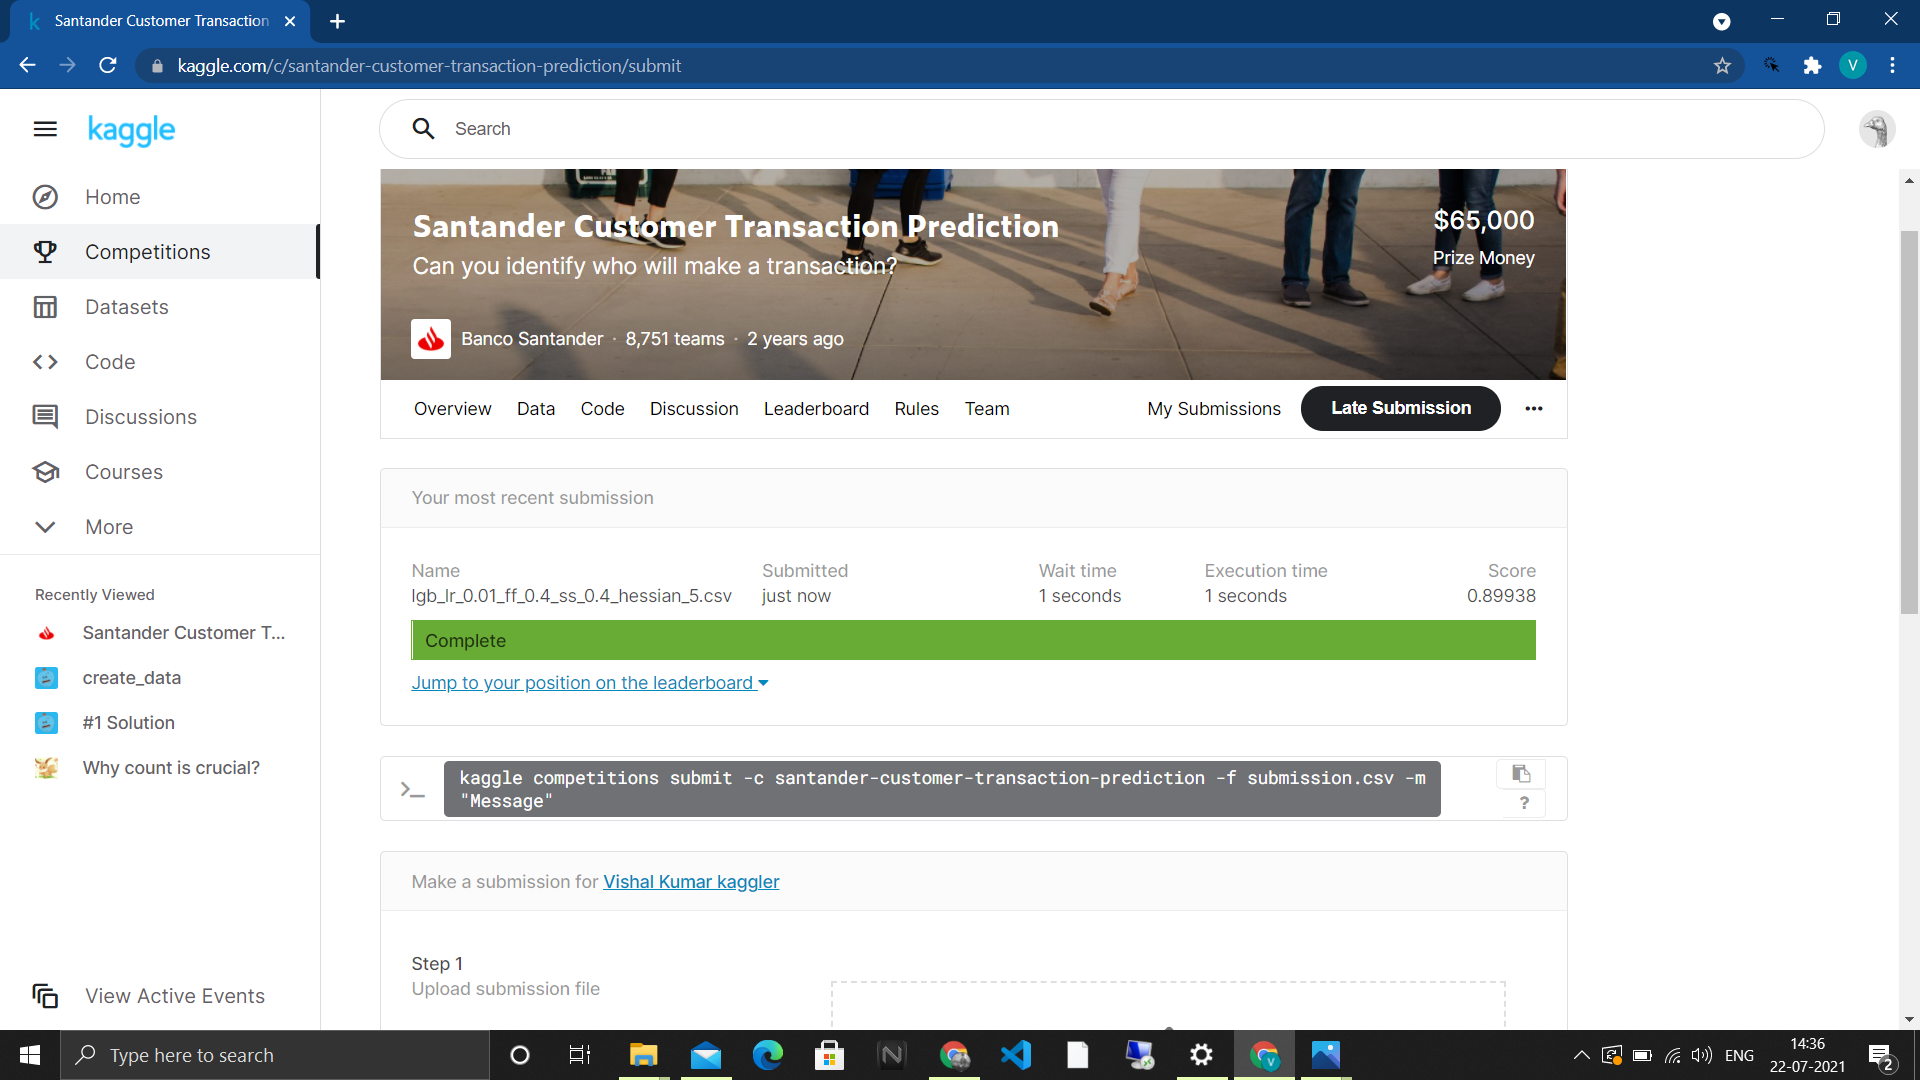

### lr=0.01,ff=0.4,bf=0.4,n_leaves=4,min_sum_hessian_in_leaf=15





In [ ]:
# LGBM PARAMETERS
param = {
    'learning_rate': 0.01,
    'num_leaves': 4,
    'metric':'auc',
    'boost_from_average':'false',
    'feature_fraction': 0.4,
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'max_depth': -1,
    'min_sum_hessian_in_leaf': 15.0,
    'objective': 'binary',
    'verbosity': 1,
    'num_threads':2
    }

In [ ]:
train_sample = lgb.Dataset(X_train, label=Y_train)
valid_sample = lgb.Dataset(X_valid, label=Y_valid)
 
#lgb classifier : training untill validation score does not increase after 3000 rounds
num_round = 500000
lgb_clf = lgb.train(param, train_sample, num_round,valid_sets = [train_sample, valid_sample], verbose_eval=500, early_stopping_rounds = 1000)


Training until validation scores don't improve for 1000 rounds.
[500]	training's auc: 0.800136	valid_1's auc: 0.784903
[1000]	training's auc: 0.842944	valid_1's auc: 0.827081
[1500]	training's auc: 0.862427	valid_1's auc: 0.845901
[2000]	training's auc: 0.874773	valid_1's auc: 0.857675
[2500]	training's auc: 0.883297	valid_1's auc: 0.866177
[3000]	training's auc: 0.889422	valid_1's auc: 0.871939
[3500]	training's auc: 0.894345	valid_1's auc: 0.876792
[4000]	training's auc: 0.898125	valid_1's auc: 0.879814
[4500]	training's auc: 0.90155	valid_1's auc: 0.882806
[5000]	training's auc: 0.904176	valid_1's auc: 0.884924
[5500]	training's auc: 0.906497	valid_1's auc: 0.886749
[6000]	training's auc: 0.908424	valid_1's auc: 0.888266
[6500]	training's auc: 0.910022	valid_1's auc: 0.889303
[7000]	training's auc: 0.911522	valid_1's auc: 0.890194
[7500]	training's auc: 0.912879	valid_1's auc: 0.890977
[8000]	training's auc: 0.914046	valid_1's auc: 0.89139
[8500]	training's auc: 0.915163	valid_1's a

** Train Metric **

In [ ]:

train_proba=lgb_clf.predict(X_train)
y_pred_label=np.where(train_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_train, train_proba)
print('auc_train:',auc_oof)


cm_train=confusion_matrix(Y_train, y_pred_label)
print('conf_mat_train:')
print(cm_train)

precision=precision_score(Y_train, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_train, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_train, y_pred_label)
print("f1 Score :",f1)


auc_train: 0.9287082387662506
conf_mat_train:
[[144200   1521]
 [  9170   7109]]
Precison Score : 0.8237543453070684
recall Score : 0.43669758584679647
f1 Score : 0.5707977036412542


**Test metrics**

In [ ]:

test_proba=lgb_clf.predict(X_test)
y_pred_label=np.where(test_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_test, test_proba)
print('auc_test:',auc_oof)


cm_train=confusion_matrix(Y_test, y_pred_label)
print('conf_mat_test:')
print(cm_train)

precision=precision_score(Y_test, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_test, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_test, y_pred_label)
print("f1 Score :",f1)


auc_test: 0.9019139576856828
conf_mat_test:
[[15967   224]
 [ 1112   697]]
Precison Score : 0.756786102062975
recall Score : 0.38529574350469875
f1 Score : 0.5106227106227106


Getting kaggle score

---



---



---



In [19]:
test_score_subm=lgb_clf.predict(X_subm)
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/lgb_lr_0.01_ff_0.4_ss_0.4_hessian_15.csv",index=False)

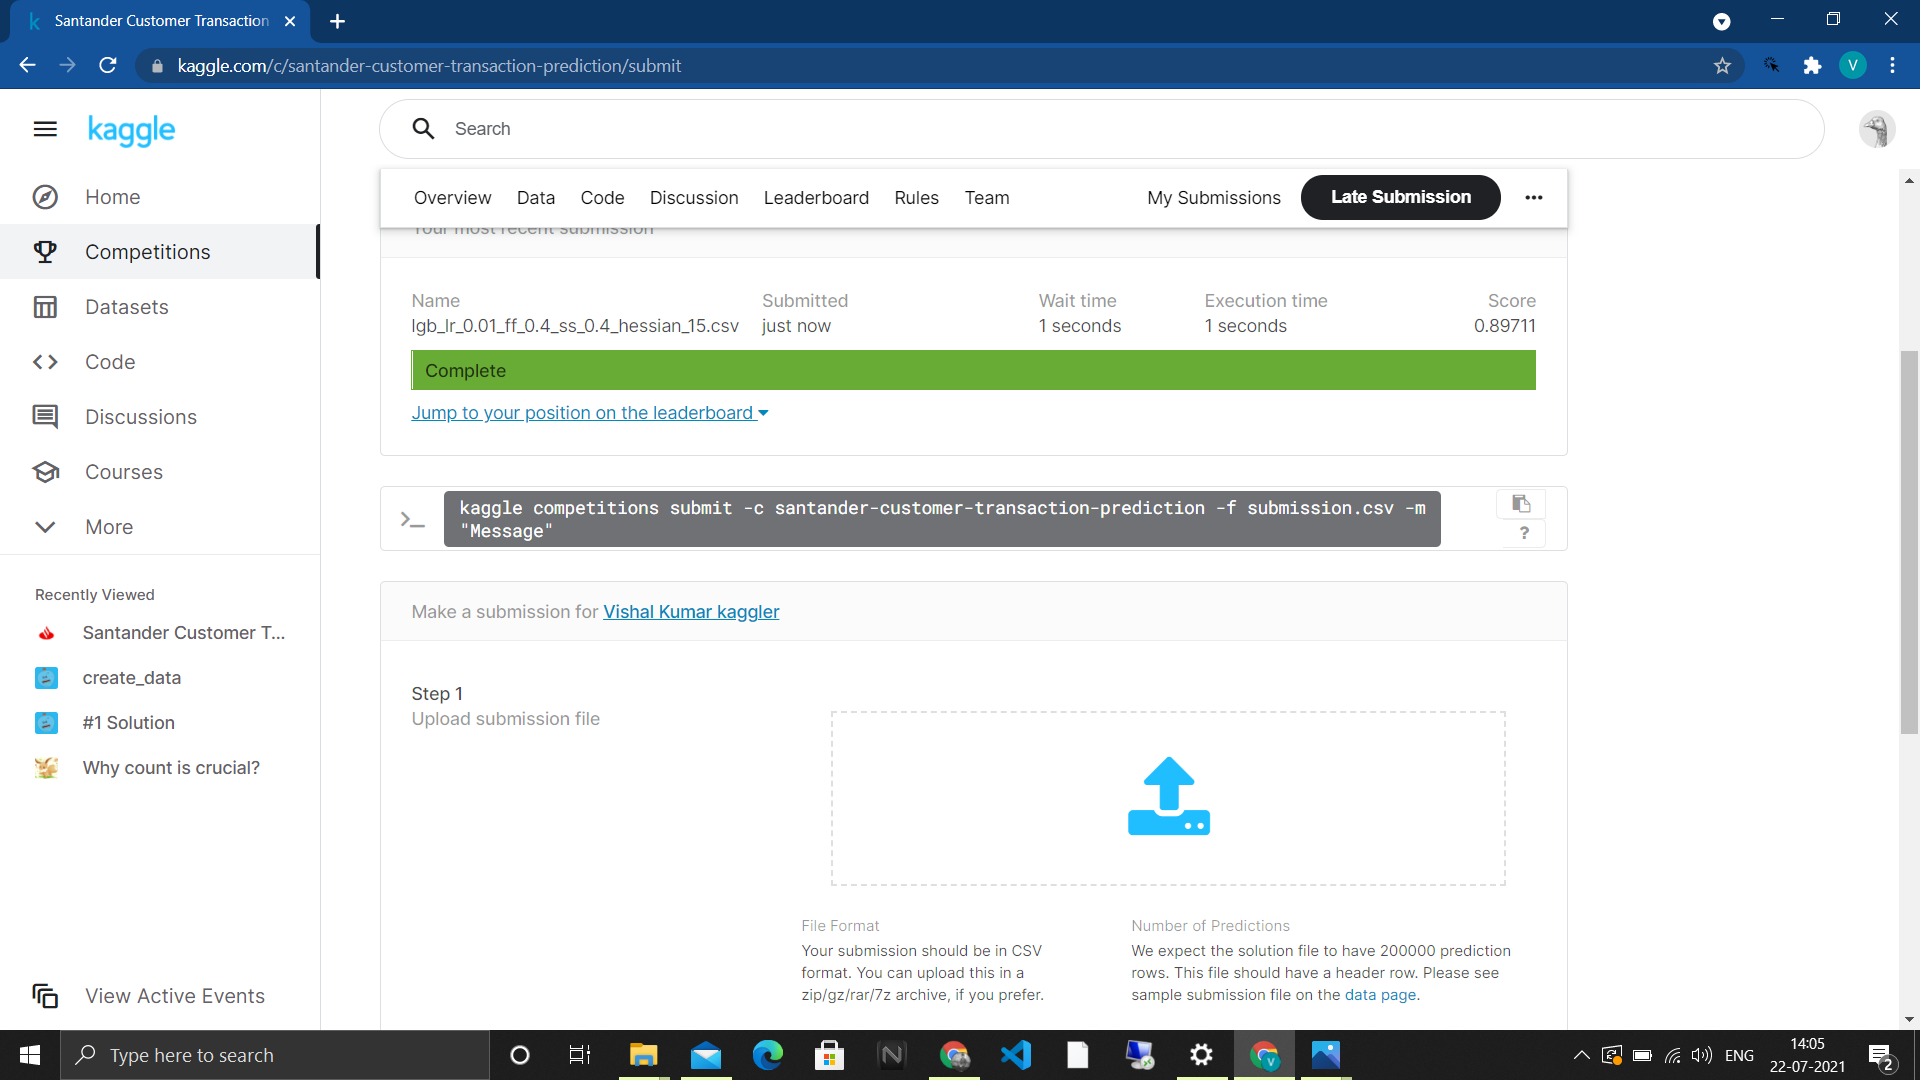

### lr=0.01,ff=0.4,bf=0.4,n_leaves=4,hessian=10

In [8]:
# LGBM PARAMETERS
param = {
    'learning_rate': 0.01,
    'num_leaves': 4,
    'metric':'auc',
    'boost_from_average':'false',
    'feature_fraction': 0.4,
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'max_depth': -1,
    'min_sum_hessian_in_leaf': 10.0,
    'objective': 'binary',
    'verbosity': 1,
    'num_threads':2
    }

In [9]:
train_sample = lgb.Dataset(X_train, label=Y_train)
valid_sample = lgb.Dataset(X_valid, label=Y_valid)
 
#lgb classifier : training untill validation score does not increase after 3000 rounds
num_round = 500000
lgb_clf = lgb.train(param, train_sample, num_round,valid_sets = [train_sample, valid_sample], verbose_eval=500, early_stopping_rounds = 1000)


Training until validation scores don't improve for 1000 rounds.
[500]	training's auc: 0.800136	valid_1's auc: 0.784903
[1000]	training's auc: 0.842944	valid_1's auc: 0.827081
[1500]	training's auc: 0.862427	valid_1's auc: 0.845901
[2000]	training's auc: 0.874773	valid_1's auc: 0.857675
[2500]	training's auc: 0.883297	valid_1's auc: 0.866177
[3000]	training's auc: 0.889422	valid_1's auc: 0.871939
[3500]	training's auc: 0.894345	valid_1's auc: 0.876792
[4000]	training's auc: 0.898127	valid_1's auc: 0.879821
[4500]	training's auc: 0.901562	valid_1's auc: 0.882866
[5000]	training's auc: 0.904174	valid_1's auc: 0.885001
[5500]	training's auc: 0.906512	valid_1's auc: 0.886834
[6000]	training's auc: 0.908409	valid_1's auc: 0.888342
[6500]	training's auc: 0.910024	valid_1's auc: 0.88942
[7000]	training's auc: 0.911529	valid_1's auc: 0.890279
[7500]	training's auc: 0.912906	valid_1's auc: 0.891024
[8000]	training's auc: 0.914084	valid_1's auc: 0.891384
[8500]	training's auc: 0.915215	valid_1's 

* Here learning get slower and taking more base learner to achieve optimal perfomance.


** Train Metric **

In [10]:

train_proba=lgb_clf.predict(X_train)
y_pred_label=np.where(train_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_train, train_proba)
print('auc_train:',auc_oof)


cm_train=confusion_matrix(Y_train, y_pred_label)
print('conf_mat_train:')
print(cm_train)

precision=precision_score(Y_train, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_train, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_train, y_pred_label)
print("f1 Score :",f1)


auc_train: 0.9303740726174451
conf_mat_train:
[[144204   1517]
 [  9085   7194]]
Precison Score : 0.8258523705659511
recall Score : 0.44191903679587197
f1 Score : 0.5757503001200479


**Test metrics**

In [11]:

test_proba=lgb_clf.predict(X_test)
y_pred_label=np.where(test_proba<0.5,0,1)

auc_oof=roc_auc_score(Y_test, test_proba)
print('auc_test:',auc_oof)


cm_train=confusion_matrix(Y_test, y_pred_label)
print('conf_mat_test:')
print(cm_train)

precision=precision_score(Y_test, y_pred_label)
print("Precison Score :",precision)

recall=recall_score(Y_test, y_pred_label)
print("recall Score :",recall)

f1=f1_score(Y_test, y_pred_label)
print("f1 Score :",f1)


auc_test: 0.901712247305939
conf_mat_test:
[[15961   230]
 [ 1106   703]]
Precison Score : 0.7534833869239014
recall Score : 0.38861249309010504
f1 Score : 0.512764405543399


* It has highest f1 test score among all the above different combination of parameters
* It has also the highest test recall score among all above . 

Getting kaggle score

---



---



---



In [12]:
#test_submission
df_subm=pd.read_csv("test.csv.zip")
X_subm=df_subm.drop('ID_code',axis=1)
del df_subm

In [14]:
test_score_subm=lgb_clf.predict(X_subm)
 
ID_code=[f'test_{i}' for i in range(200000)]
d={'ID_code':ID_code,'target':test_score_subm}
submission=pd.DataFrame(data=d)
 
submission.to_csv("STP_LR/lgb_lr_0.01_ff_0.4_ss_0.4.csv",index=False)

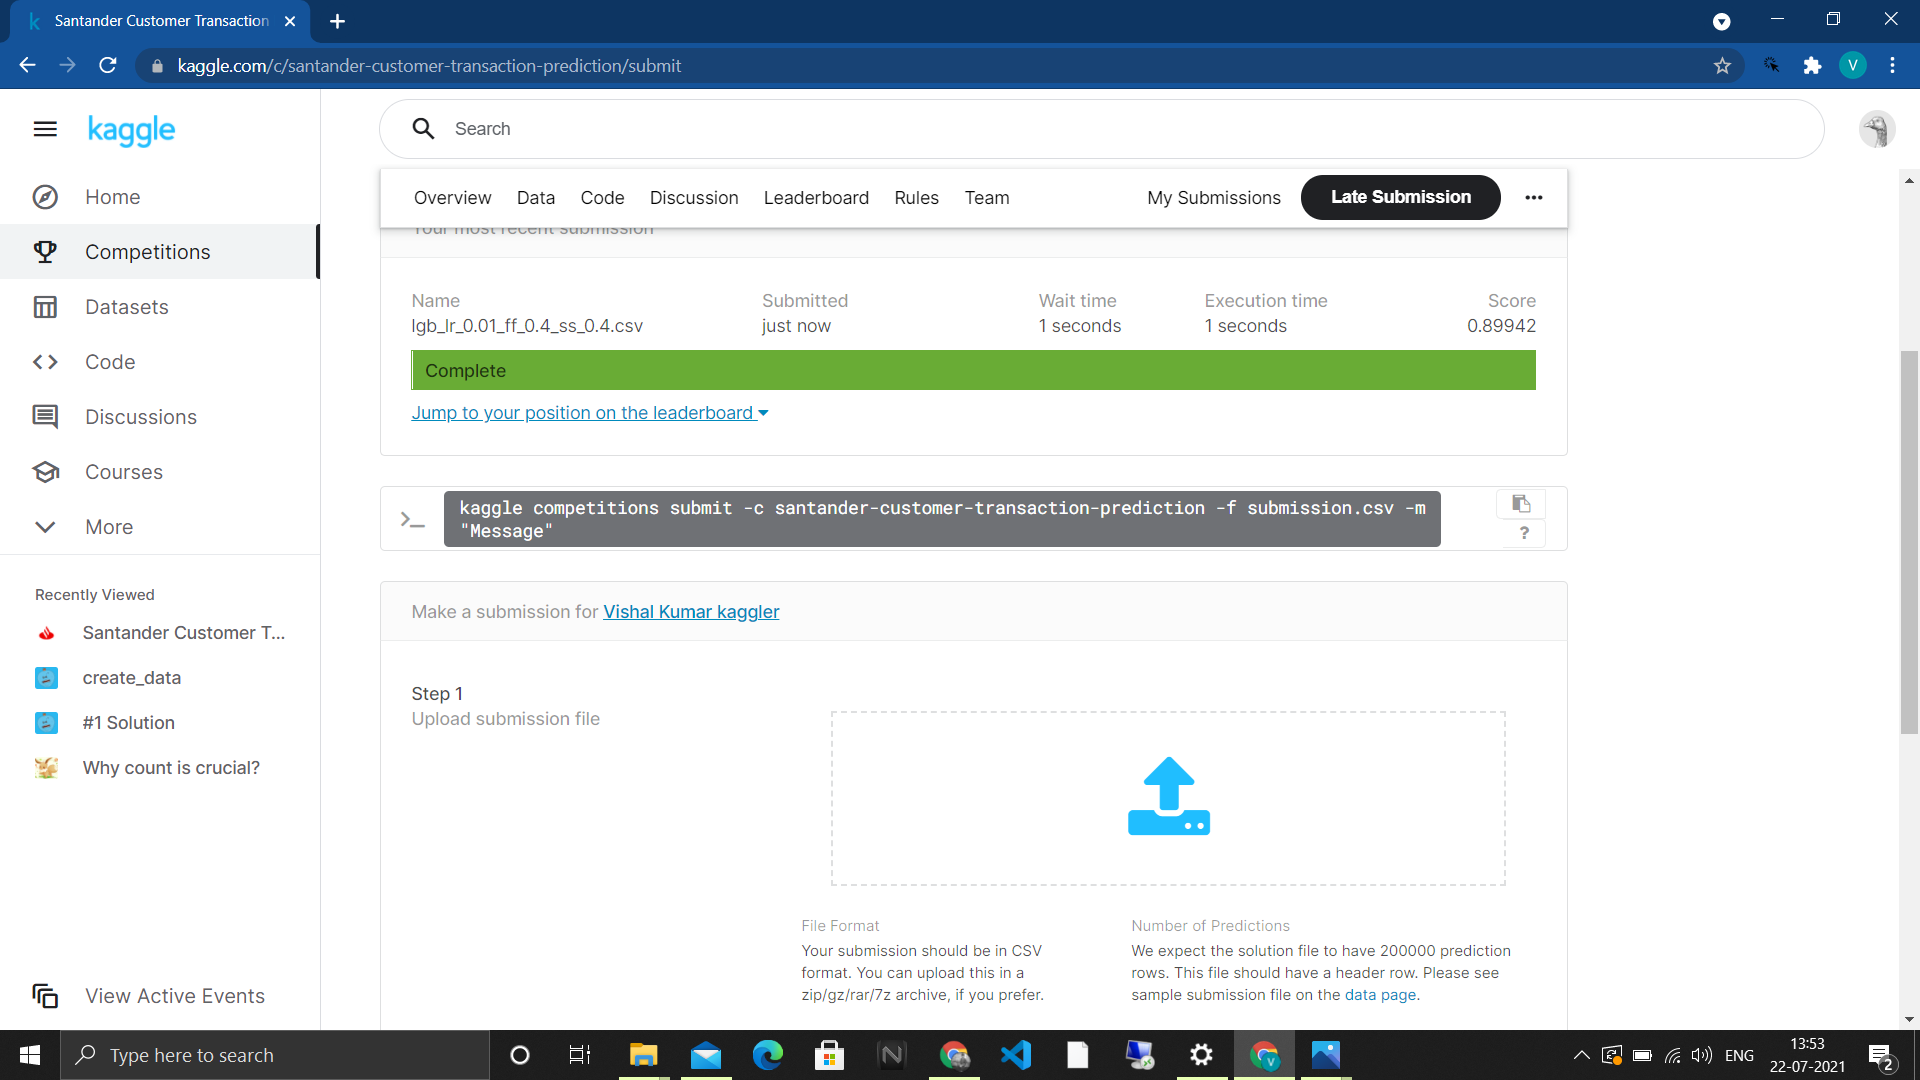

* Note:This is the best kaggle score then all previous models (RF,DT,LR,meta learned model)

### Best parameter

**Best Parameter from above**

* lr=0.01 --> smaller the step towards right direct direction higher the perfomance if there is no noise in data. Noisy data may easily leads to overfitting if lr is very small.

* feature_fraction=0.4 & bagging_fraction=0.4 ---> reduces overfitting 

* min_sum_in_hessian_leaf =10 --> It also reduces overfitting

* All the above parameters are choosen on the basis of recall_score>f1_score>auc_score in that order

In [36]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
t = PrettyTable(["Model","Learning rate","bagging fraction","feature fraction","n_leaves","hessian", "kaggle score"])
  
# Add rows
t.add_row(["LGBM","0.1","1.0","1.0","4","10","0.89577"])
t.add_row(["LGBM","0.1","1.0","1.0","8","10","0.89360"])


t.add_row(["LGBM","0.05","0.5","0.5","4","10","0.89711"])
t.add_row(["LGBM","0.05","0.7","0.7","4","10","0.89842"])

t.add_row(["LGBM","0.01","0.7","0.7","4","10","0.89869"])
t.add_row(["LGBM","0.01","0.3","0.3","4","10","0.89925"])
t.add_row(["LGBM","0.01","0.4","0.4","4","5","0.89938"])
t.add_row(["LGBM","0.01","0.4","0.4","4","10","0.89942"])
t.add_row(["LGBM","0.01","0.4","0.4","4","15","0.89711"])
print(t)


+-------+---------------+------------------+------------------+----------+---------+--------------+
| Model | Learning rate | bagging fraction | feature fraction | n_leaves | hessian | kaggle score |
+-------+---------------+------------------+------------------+----------+---------+--------------+
|  LGBM |      0.1      |       1.0        |       1.0        |    4     |    10   |   0.89577    |
|  LGBM |      0.1      |       1.0        |       1.0        |    8     |    10   |   0.89360    |
|  LGBM |      0.05     |       0.5        |       0.5        |    4     |    10   |   0.89711    |
|  LGBM |      0.05     |       0.7        |       0.7        |    4     |    10   |   0.89842    |
|  LGBM |      0.01     |       0.7        |       0.7        |    4     |    10   |   0.89869    |
|  LGBM |      0.01     |       0.3        |       0.3        |    4     |    10   |   0.89925    |
|  LGBM |      0.01     |       0.4        |       0.4        |    4     |    5    |   0.89938    |


best_parameter

* lr=0.01, bagging fraction =0.4, feature fraction=0.4 ,n_leaves=4 ,hessian=10 